# Figure 4 Example

This notebook provides some example usage of the data release associated with figure 4 of [Abbott et al. (2018)](https://arxiv.org/abs/1805.11579).

In [1]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt

Download and extract the relevant data.

In [2]:
public_dcc_url = 'https://dcc.ligo.org/public/0150/P1800061/009/'

!curl -O {public_dcc_url}"figure_4.tar.gz"
!tar -xvf figure_4.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  465k  100  465k    0     0  1260k      0 --:--:-- --:--:-- --:--:-- 1257k
x figure_4/
x figure_4/volumetric_marginal_posterior_pdf.dat.gz
x figure_4/dist_grid_pts.dat.gz
x figure_4/README.md
x figure_4/em_dist_prior_marginal_posterior_pdf.dat.gz
x figure_4/incl_grid_pts.dat.gz


Load the grip points, and the values of the 2-D marginal posterior distributions.

In [2]:
# Grid points in distance and inclination (theta_jn)
XX = np.loadtxt('./figure_4/incl_grid_pts.dat.gz')
YY = np.loadtxt('./figure_4/dist_grid_pts.dat.gz')

# Posterior PDF values for the marginal distributions shown in Figure 4
gw_Z = np.loadtxt('./figure_4/volumetric_marginal_posterior_pdf.dat.gz')
em_Z = np.loadtxt('./figure_4/em_dist_prior_marginal_posterior_pdf.dat.gz')

## 2-D Marginal Posterior Distributions

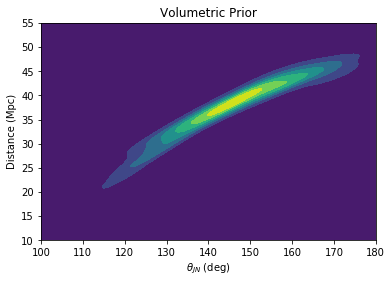

In [3]:
plt.contourf(XX, YY, gw_Z)

plt.title('Volumetric Prior')
plt.xlabel(r'$\theta_{JN}$ (deg)')
plt.ylabel('Distance (Mpc)');

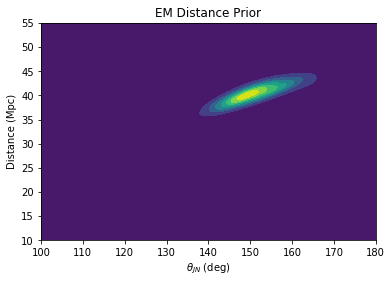

In [4]:
plt.contourf(XX, YY, em_Z)

plt.title('EM Distance Prior')
plt.xlabel(r'$\theta_{JN}$ (deg)')
plt.ylabel('Distance (Mpc)');

## 1-D Marginal Posterior Distributions

In [5]:
# Extract the 1-D grids for 1-D marginal distribution plots
theta_jns = XX[0, :]
d_theta_jn = theta_jns[1] - theta_jns[0]

dists = YY[:, 0]
d_dist = dists[1] - dists[0]

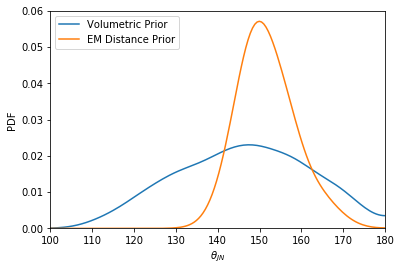

In [6]:
plt.plot(theta_jns, d_dist*np.sum(gw_Z, axis=0), label='Volumetric Prior')
plt.plot(theta_jns, d_dist*np.sum(em_Z, axis=0), label='EM Distance Prior')
plt.xlim(theta_jns[0], theta_jns[-1])
plt.ylim(ymin=0)
plt.legend(loc='upper left')

plt.xlabel(r'$\theta_{JN}$')
plt.ylabel('PDF');

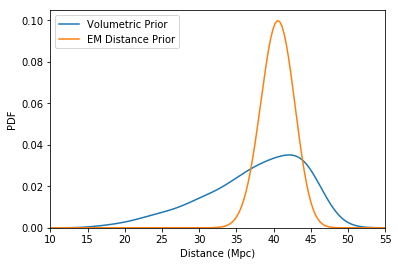

In [7]:
plt.plot(dists, d_dist*np.sum(gw_Z, axis=1), label='Volumetric Prior')
plt.plot(dists, d_dist*np.sum(em_Z, axis=1), label='EM Distance Prior')
plt.xlim(dists[0], dists[-1])
plt.ylim(ymin=0)
plt.legend(loc='upper left')

plt.xlabel('Distance (Mpc)')
plt.ylabel('PDF');